In [ ]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.5 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 4.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Unin

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [ ]:
class Anyclass(d2l.Classifier):
  def stem(self, num_channels):
    return nn.Sequential(
        nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
        nn.LazyBatchNorm2d(),
        nn.ReLU()
    )

In [ ]:
@d2l.add_to_class(Anyclass)
def stage(self,depth, num_channels, groups, bot_mul):
  blk = []
  for i in range(depth):
    if i == 0:
      blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul, use_1x1conv=True, strides=2))
    else:
      blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
  return nn.Sequential(*blk)



In [ ]:
@d2l.add_to_class(Anyclass)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
  super(Anyclass, self).__init__()
  self.save_hyperparameters()
  self.net = nn.Sequential(self.stem(stem_channels))
  for i, s in enumerate(arch):
    self.net.add_module(f'stage{i+1}', self.stage(*s))
  self.net.add_module('head', nn.Sequential(
      nn.AdaptiveAvgPool2d((1, 1)),
      nn.Flatten(),nn.LazyLinear(num_classes)
  ))
  self.net.apply(d2l.init_cnn)

# RegNetx32

In [ ]:
class RegNet32(Anyclass):
  def __init__(self, lr=0.1, num_classes=10):
    stem_channels, groups, bot_mul = 32, 16, 1
    depths, channels = (4, 6), (32,80)
    super().__init__(((depths[0], channels[0], groups, bot_mul),
                      (depths[1], channels[1], groups, bot_mul)),
                     stem_channels, lr, num_classes)

In [ ]:
RegNet32().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 32, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 80, 12, 12])
Sequential output shape:	 torch.Size([1, 10])


In [ ]:
model = RegNet32(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

100%|██████████| 26421880/26421880 [00:04<00:00, 5602340.97it/s] 


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 339726.24it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6319162.79it/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7257908.23it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw




/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


KeyboardInterrupt: 

#The error empirical distribution function (   Hàm phân phối lỗi (EDF))

Chúng tôi tạo và huấn luyện nhiều mô hình từ một không gian thiết kế bằng cách sử dụng phương pháp huấn luyện nhanh, tập trung vào hiệu quả với mức tính toán thấp và ít vòng lặp huấn luyện hơn. Chúng tôi phân tích hiệu suất mô hình bằng cách sử dụng hàm phân phối lỗi (EDF) để xem có bao nhiêu mô hình hoạt động dưới một mức lỗi nhất định. Chúng tôi hình dung các thuộc tính của mô hình và sử dụng các phương pháp thống kê để hiểu rõ hơn về không gian thiết kế, giúp cải thiện việc thiết kế mô hình trong tương lai.

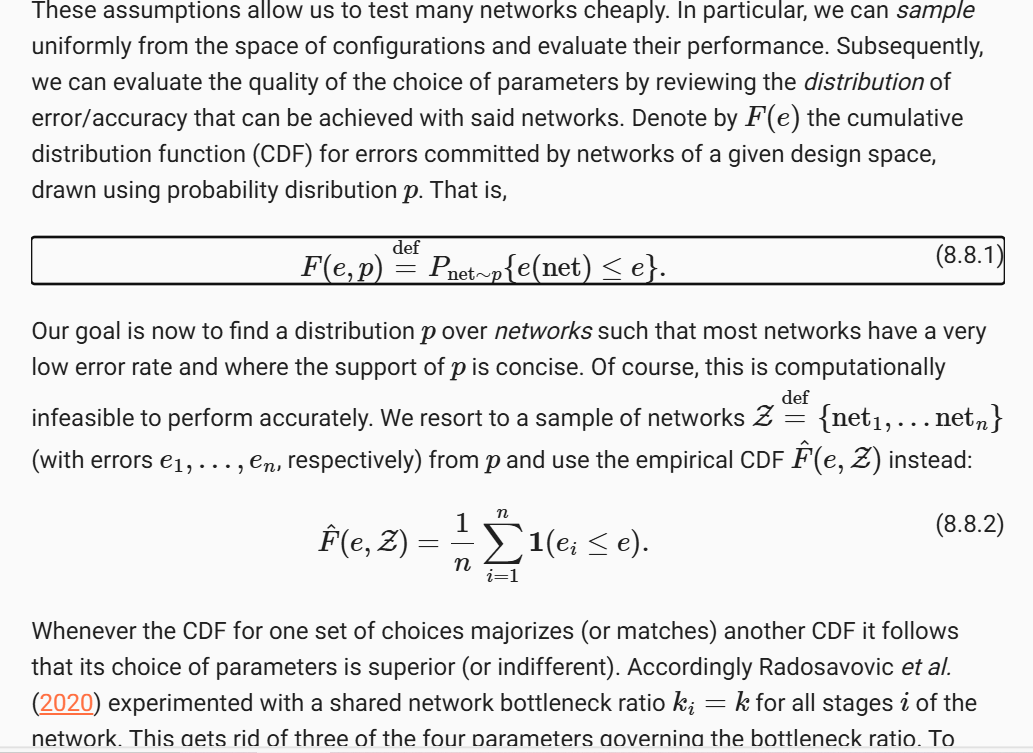

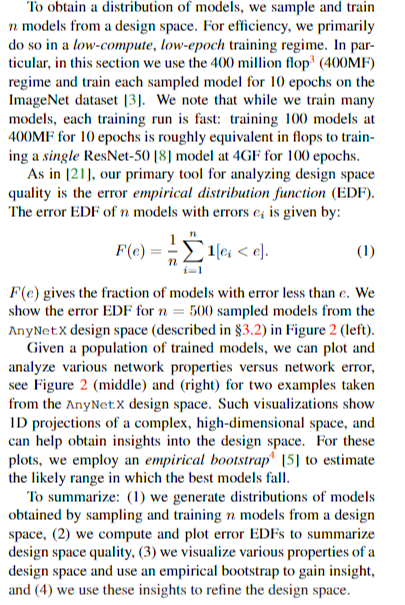